# SVM fitting on real data

### Imports and set seed for reproducibility

In [1]:
import random
import numpy as np

# Set the random seed for reproducibility.
seed = 16
random.seed(seed)
np.random.seed(seed)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import time

# Import SVM from the ado library.
from ado import SVM

### Load the occupancy training and test data

In [3]:
training_data = pd.read_csv('../data/occupancy/datatraining.csv')
# Shuffle the training data.
training_data.sample(frac=1)

x_train = training_data.iloc[:,:5].to_numpy()
y_train = training_data.iloc[:,5].to_numpy()

test_data = pd.read_csv('../data/occupancy/datatest2.csv')
# Shuffle the training data.
test_data.sample(frac=1)

x_test = test_data.iloc[:,:5].to_numpy()
y_test= test_data.iloc[:,5].to_numpy()

print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")

Number of training samples: 8142
Number of test samples: 9751


### Normalize the data to 0-1 range and set labels to -1,+1

In [4]:
def normalize(x:np.array):
    return (x.astype(float) - np.min(x)) / (np.max(x) - np.min(x))

x_train = normalize(x_train)
y_train[y_train == 0] = -1

x_test = normalize(x_test)
y_test[y_test == 0] = -1

### Project the 5 dimensional data into 2 dimensions by using PCA

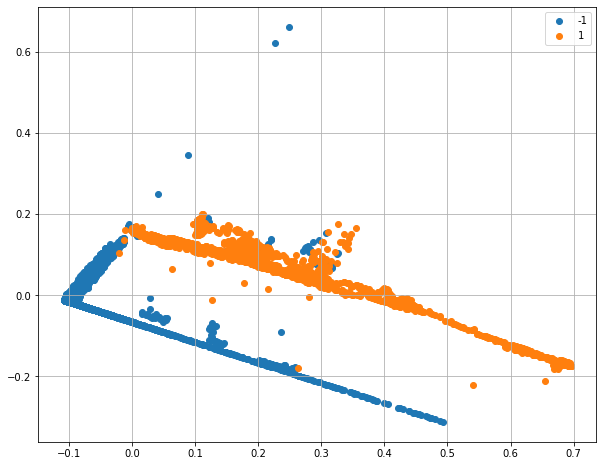

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x_train_2_components = PCA(n_components=2).fit_transform(x_train)

fig, ax = plt.subplots(figsize=(10,8))
for y_value in np.unique(y_train):
    ix = np.where(y_train == y_value)
    ax.scatter(x_train_2_components[ix,0], x_train_2_components[ix,1], label = y_value)
ax.legend()
ax.grid()
plt.show()

### Fit the SVM on the training data

In [6]:
model = SVM(C=1.0, tol=1e-4, kernel='linear', max_steps=1, seed=seed, sigma=5)

start = time.time()

# Fit the model.
model.fit(x_train, y_train)

end = time.time()
print(f"Elapsed time: {round(end - start,2)} s.")


Elapsed time: 17.88 s.


### Run inference and compute accuracy

In [7]:
y_pred = model.predict(x_test)

print(f"Accuracy: {np.round(np.sum(y_pred == y_test)/len(x_test)*100,2)} %")

Accuracy: 98.17 %
